In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:\\Q&A PDFS\\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
#Task-1
#Performimg exploratory data analysis (EDA) to gain insights into the dataset.

In [3]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output = False)
encoded = OHE.fit_transform(df[['Fuel_Type']])
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out(['Fuel_Type']))
df = pd.concat([df.drop(columns=['Fuel_Type']), encoded_df], axis=1)

In [5]:
df=df.drop(columns='Cylinders') #This variable is dropped due to the zero variance

In [6]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198,-0.039536,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,0.002389,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598,0.144016,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614,0.062109,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249,0.001486,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637,0.005941,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618,0.009680,0.025495,-0.027589
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613,-0.049537,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000,0.052756,0.568087,-0.560470
Fuel_Type_CNG,-0.039536,0.002389,0.144016,0.062109,0.001486,0.005941,0.009680,-0.049537,0.052756,1.000000,-0.038074,-0.296717


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1436 non-null   int64  
 1   Age_08_04         1436 non-null   int64  
 2   KM                1436 non-null   int64  
 3   HP                1436 non-null   int64  
 4   Automatic         1436 non-null   int64  
 5   cc                1436 non-null   int64  
 6   Doors             1436 non-null   int64  
 7   Gears             1436 non-null   int64  
 8   Weight            1436 non-null   int64  
 9   Fuel_Type_CNG     1436 non-null   float64
 10  Fuel_Type_Diesel  1436 non-null   float64
 11  Fuel_Type_Petrol  1436 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 134.8 KB


In [8]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,5.026462,1072.45961,0.011838,0.107939,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.188510,52.64112,0.108196,0.310411,0.324814
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,3.000000,1000.00000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,5.000000,1040.00000,0.000000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,5.000000,1070.00000,0.000000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,5.000000,1085.00000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,6.000000,1615.00000,1.000000,1.000000,1.000000


In [9]:
#Providing visualizations and summary statistics of the variables.
import matplotlib.pyplot as plt
import seaborn as sns

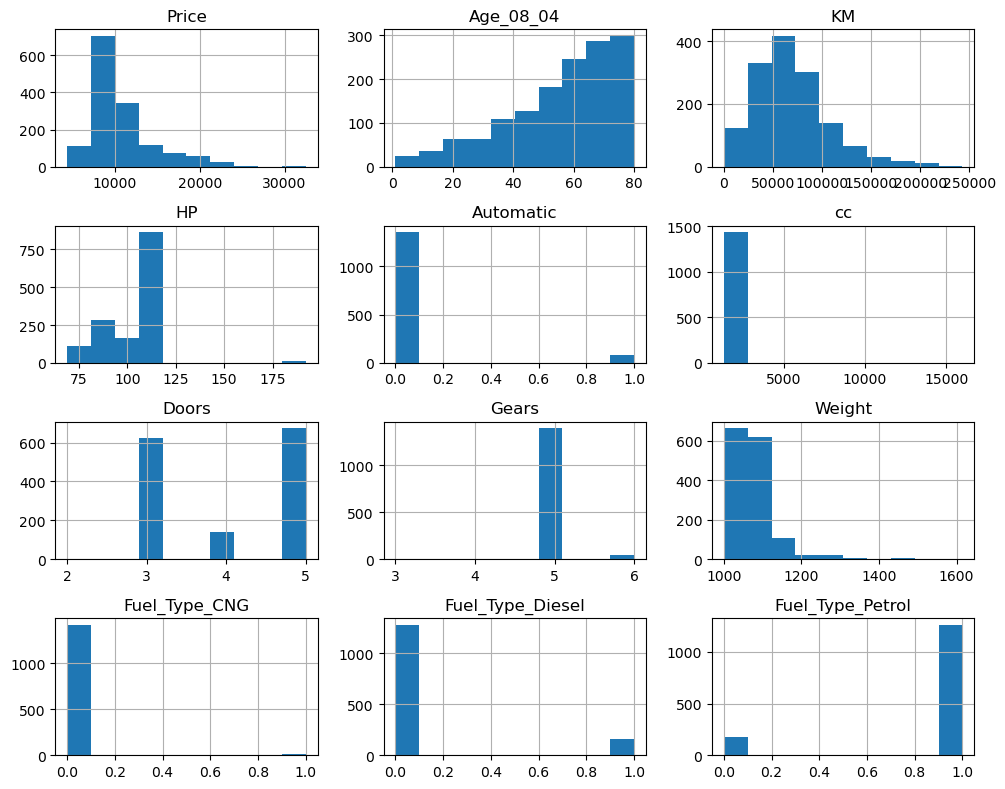

In [10]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [11]:
numerical_cols = df.select_dtypes(include=['int','float']).columns.tolist()
numerical_cols.remove('Price')

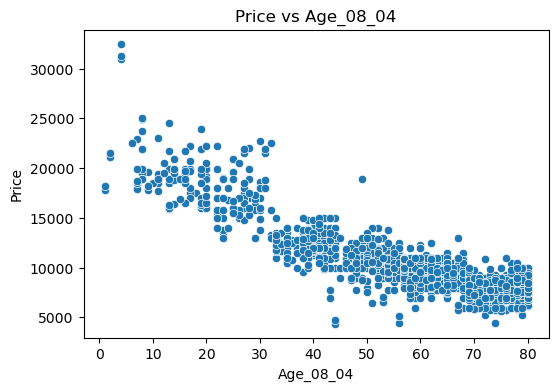

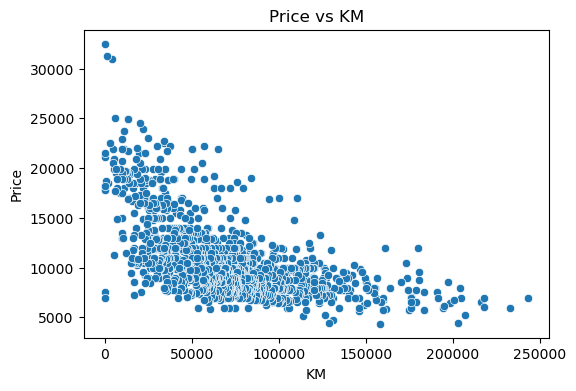

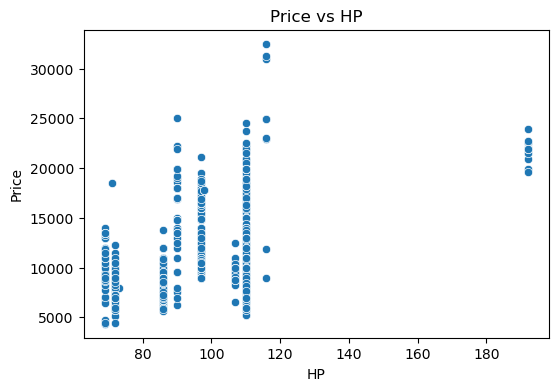

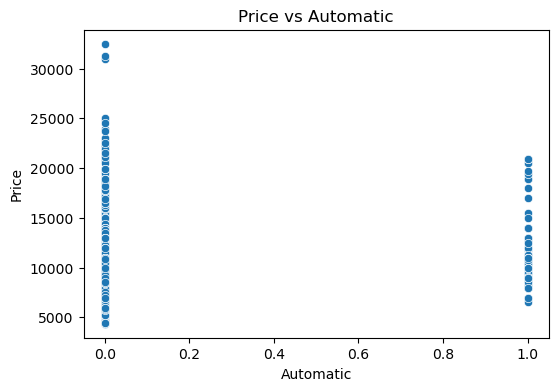

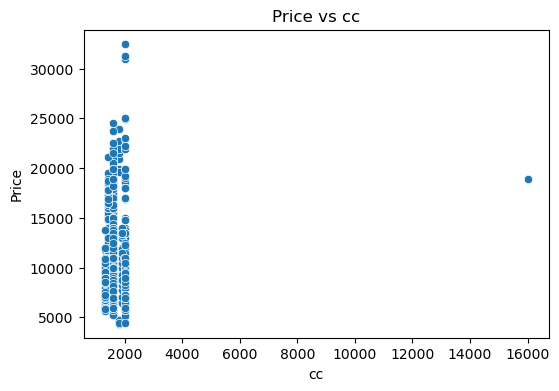

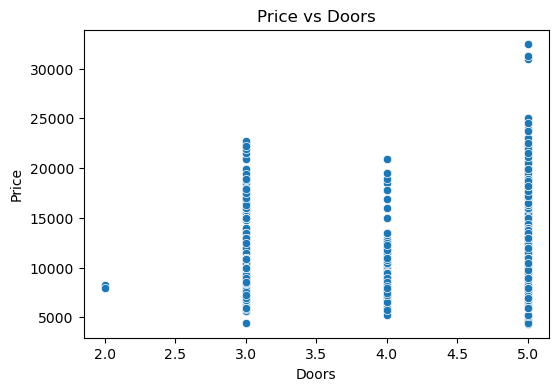

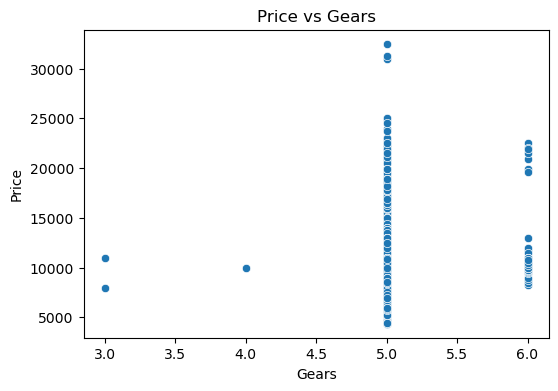

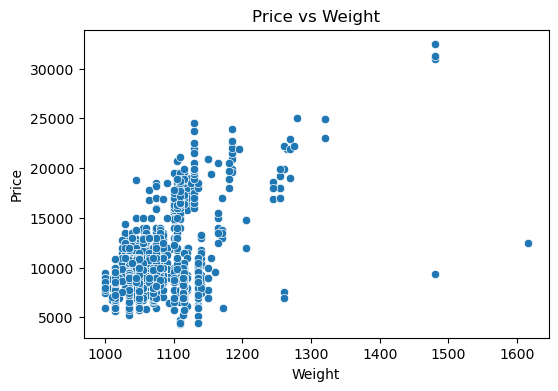

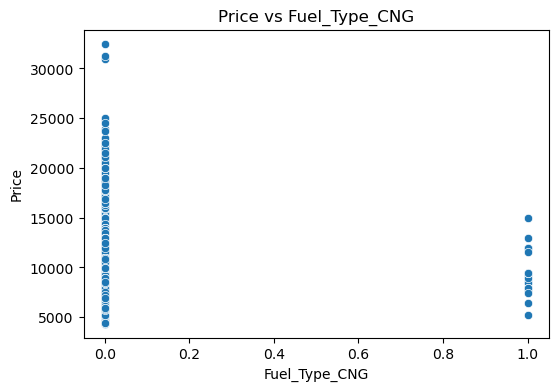

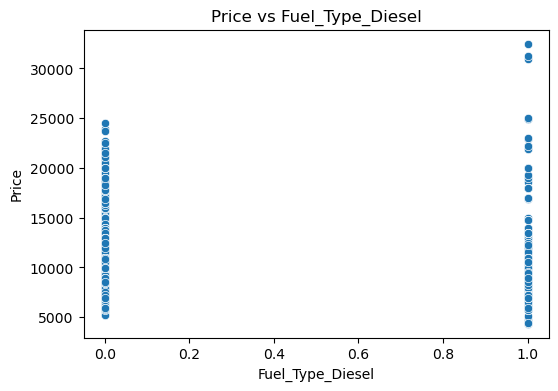

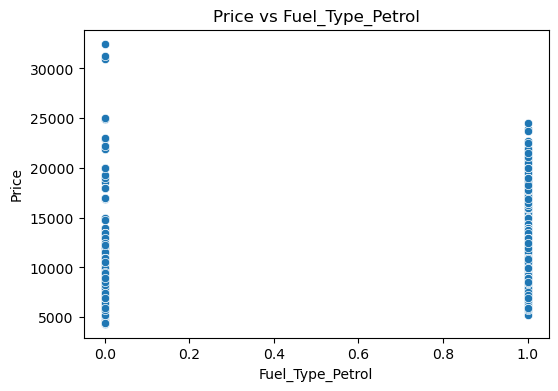

In [12]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y='Price', data=df)
    plt.title(f'Price vs {col}')
    plt.show

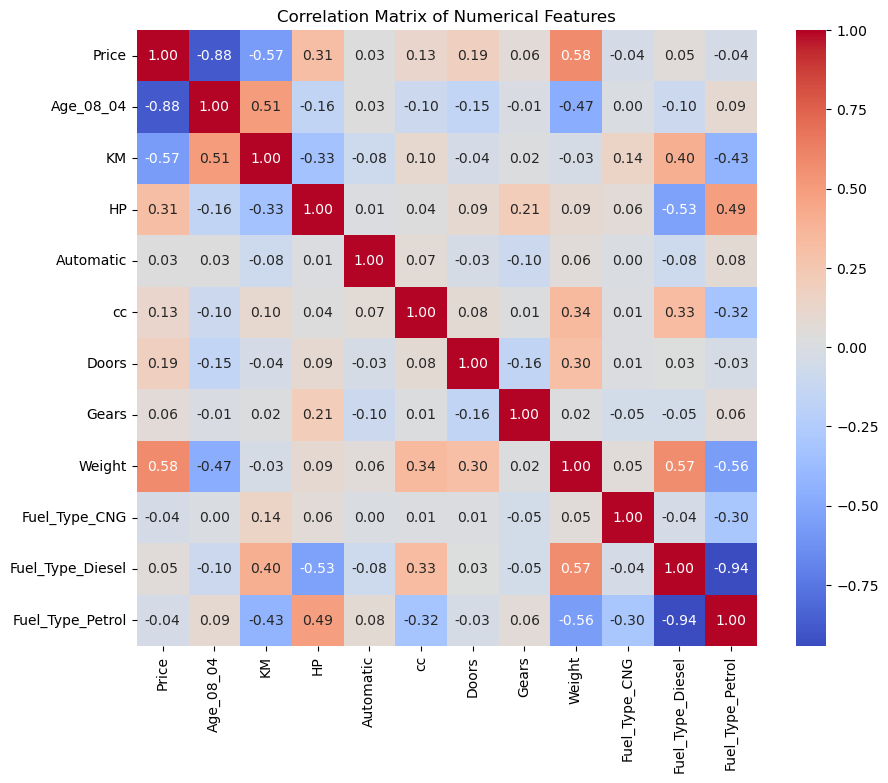

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [14]:
# Pre process the data to apply the MLR.
from sklearn.preprocessing import StandardScaler
Scaler  = StandardScaler()

In [15]:
original_columns =df.columns
df =pd.DataFrame(Scaler.fit_transform(df), columns=original_columns)

In [16]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.763763,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,0.832715,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,0.887877,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,1.163685,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,0.832715,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.031491,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


In [17]:
#for the model building i'm selecting Age,km,hp,weight as the feature for the targeted variable price because they are the only
#feature variables which are having high correlation with the Targeted Variable

In [18]:
#model-1
X = df[['Age_08_04', 'KM', 'HP', 'Weight']]
Y = df['Price']

In [19]:
#Task-2
#Spliting the dataset into training and testing sets (e.g., 80% training, 20% testing).
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
#Task-3
#.Building a multiple linear regression model using the training dataset.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
#predictions
y_pred_train= model.predict(X_train)
y_pred_test=model.predict(X_test)

In [22]:
y_pred_train

array([-0.47372693, -0.49272713,  0.80742105, ..., -0.75590198,
       -0.61872404, -1.16024202])

In [23]:
y_pred_test

array([ 0.16246617, -0.48891128, -0.33590339, -0.48173771, -0.16098549,
       -0.79877365, -0.53442481, -0.65174903,  0.93771332,  0.68205838,
       -0.36989325, -0.368566  ,  0.6286872 ,  0.65059506, -0.2666081 ,
       -0.68602282,  0.43161128,  1.85348993, -0.94720579, -0.41477381,
        0.57755449,  1.95660015, -0.77293197, -0.06202539, -0.92910912,
        1.45212288, -0.32448369, -0.95827314,  1.31679446,  1.06734427,
       -0.70833441, -0.21946441, -0.59997989, -0.16127328, -0.11076018,
       -0.73974667, -0.49872128, -0.19848444,  1.50875585, -0.34374201,
       -0.21992874, -0.31529404, -0.7799851 , -1.49807058, -1.09518787,
        1.73954797, -0.34510815, -0.0069799 , -0.55068566,  0.78679148,
        0.65519641, -1.21700302,  1.0950069 ,  1.51037126, -1.33594942,
       -0.82456475, -0.07036549, -0.15573357,  1.45268533,  2.24252135,
        0.51952495, -0.70031804, -0.79076139,  0.06898279,  0.74507113,
       -0.49818919,  0.69165619, -0.88841551, -0.68224164,  0.02

In [24]:
model.coef_ #interpretting the coefficients of the model

array([-0.61552052, -0.20922528,  0.11999921,  0.28692472])

In [25]:
import numpy as np
from sklearn.metrics import root_mean_squared_error,r2_score
rmse = root_mean_squared_error(Y_train,y_pred_train)
print("Root Mean squared error for training dataset:" , np.round(rmse,2))

Root Mean squared error for training dataset: 0.37


In [26]:
r2 = r2_score(Y_train,y_pred_train)
print("R square for training dataset:" , np.round(r2,2))

R square for training dataset: 0.86


In [27]:
#Task-4
#performing the evaluation metrics on the testing dataset
rmse = root_mean_squared_error(Y_test,y_pred_test)
print("Root Mean squared error test dataset:" , np.round(rmse,2))

Root Mean squared error test dataset: 0.39


In [28]:
r2 = r2_score(Y_test,y_pred_test)
print("R square for test dataset:" , np.round(r2,2))

R square for test dataset: 0.85


In [29]:
#model-2
X = df[['Age_08_04', 'HP', 'Weight']]
Y = df['Price']

In [30]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [32]:
#predictions
y_pred_train= model.predict(X_train)
y_pred_test=model.predict(X_test)

In [33]:
y_pred_train

array([-0.58089801, -0.53708226,  0.76984123, ..., -0.86634523,
       -0.68452626, -1.01518086])

In [34]:
y_pred_test

array([-0.0156774 , -0.45203333, -0.20113332, -0.50777128, -0.24745975,
       -0.80255853, -0.47597848, -0.79202796,  1.02746985,  0.61047503,
       -0.3031977 , -0.45203333,  0.62905435,  0.58194585, -0.17314248,
       -0.78547159,  0.42257965,  1.9954464 , -0.67250331, -0.50777128,
        0.63958492,  1.89077046, -0.85044883, -0.1750436 , -0.85978886,
        1.35693391, -0.33379997, -0.71234486,  1.22229466,  1.02746985,
       -0.67250331, -0.25819141, -0.66713748, -0.11472161, -0.11472161,
       -0.73092418, -0.41755761, -0.15456316,  1.46134396, -0.1279351 ,
       -0.27408781, -0.35377091, -0.82650368, -1.18388709, -1.18388709,
        1.77929456, -0.31392936,  0.0314311 , -0.70578849,  0.65031658,
        0.58384697, -1.38309484,  1.14261156,  1.3383546 , -1.14404554,
       -0.78666213, -0.01914211, -0.10548233,  1.34103751,  2.58390213,
        0.72999968, -0.52523155, -0.67250331,  0.2233719 ,  0.78842055,
       -0.35377091,  0.61339458, -0.63266176, -0.45203333, -0.09

In [35]:
model.coef_ #interpretting the coefficients of the model

array([-0.74079429,  0.17650617,  0.22377559])

In [36]:
rmse = root_mean_squared_error(Y_train,y_pred_train)
print("Root Mean squared error for training dataset:" , np.round(rmse,2))

Root Mean squared error for training dataset: 0.4


In [37]:
r2 = r2_score(Y_train,y_pred_train)
print("R square for training dataset:" , np.round(r2,2))

R square for training dataset: 0.84


In [38]:
#evaluation metrics on the testing dataset
rmse = root_mean_squared_error(Y_test,y_pred_test)
print("Root Mean squared error test dataset:" , np.round(rmse,2))

Root Mean squared error test dataset: 0.41


In [39]:
r2 = r2_score(Y_test,y_pred_test)
print("R square for test dataset:" , np.round(r2,2))

R square for test dataset: 0.83


In [40]:
#model-3
X = df[['Age_08_04', 'KM', 'HP']]
Y = df['Price']

In [41]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [43]:
#predictions
y_pred_train= model.predict(X_train)
y_pred_test=model.predict(X_test)

In [44]:
model.coef_ #interpretting the coefficients of the model

array([-0.78819293, -0.11699279,  0.14321162])

In [45]:
rmse = root_mean_squared_error(Y_train,y_pred_train)
print("Root Mean squared error for training dataset:" , np.round(rmse,2))

Root Mean squared error for training dataset: 0.43


In [46]:
r2 = r2_score(Y_train,y_pred_train)
print("R square for training dataset:" , np.round(r2,2))

R square for training dataset: 0.81


In [47]:
#Task-4
#evaluation metrics on the testing dataset
rmse = root_mean_squared_error(Y_test,y_pred_test)
print("Root Mean squared error test dataset:" , np.round(rmse,2))

Root Mean squared error test dataset: 0.44


In [48]:
r2 = r2_score(Y_test,y_pred_test)
print("R square for test dataset:" , np.round(r2,2))

R square for test dataset: 0.81


In [49]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.763763,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,0.832715,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,0.887877,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,1.163685,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,0.832715,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.031491,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


In [50]:
#Task-5
#Applying ridge method
X = df.iloc[ : , 1: ]
Y = df['Price']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [52]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, Y_train)

Ridge()

In [53]:
y_pred_ridge = model_ridge.predict(X_test)

In [54]:
from sklearn.metrics import root_mean_squared_error, r2_score
rmse_ridge = root_mean_squared_error(Y_test, y_pred_ridge)
r2_ridge = r2_score(Y_test, y_pred_ridge)

In [55]:
rmse_ridge

0.4091316784127248

In [56]:
r2_ridge

0.8350836580544331

In [57]:
coeff = model_ridge.coef_
pd.DataFrame(coeff, X.columns, columns=['Coefficient'])

,Coefficient
Age_08_04,-0.619096
KM,-0.168263
HP,0.058454
Automatic,0.009492
cc,-0.003538
Doors,-0.015588
Gears,0.028676
Weight,0.374852
Fuel_Type_CNG,-0.019319
Fuel_Type_Diesel,-0.060652


In [58]:
#Applying Lasso Method
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.763763,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,0.832715,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,0.887877,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,1.163685,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,0.832715,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.031491,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


In [60]:
#Applying the Lasso Method
X = df.iloc[ : , 1: ]
Y = df['Price']

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [62]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha =1.0)
lasso_model.fit(X_train, Y_train)

Lasso()

In [63]:
y_pred_lasso = lasso_model.predict(X_test)

In [69]:
from sklearn.metrics import root_mean_squared_error, r2_score
rmse_lasso = root_mean_squared_error(Y_test, y_pred_lasso)
r2_lasso = r2_score(Y_test, y_pred_lasso)

In [70]:
rmse_lasso

1.0079893404397893

In [71]:
r2_lasso

-0.0010352178542201163

In [76]:
coeff = lasso_model.coef_
coeff = pd.DataFrame(coeff, X.columns, columns=['Coefficient'])
coeff

,Coefficient
Age_08_04,-0.0
KM,-0.0
HP,0.0
Automatic,0.0
cc,0.0
Doors,0.0
Gears,0.0
Weight,0.0
Fuel_Type_CNG,-0.0
Fuel_Type_Diesel,0.0


In [77]:
#Interview Questions
#1.What is Normalization & Standardization and how is it helpful?
#Both Normalization and Standardization are feature scaling techniques used in data preprocessing for machine learning models.
#Normalization Transforms data to fit within a specific range usually [0, 1].
#Standardization(Z-Score) centers data around the mean 0 with a standard deviation of 1.

In [78]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?
#1.Removing the Highly Correlated Features(X-variables).
#2.Performing the Principal Component Analysis
#3.Performing Ridge Regression Method
#4.Performing Lasso Regression Method
#5.and so on